In [169]:
import io

import requests

import scipy as sp
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae



In [181]:
response = requests.request(
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv',
    method = 'GET')

In [186]:
dataset = sp.genfromtxt(
    io.StringIO( response.text ), 
    delimiter=','
)

In [187]:
df = pd.DataFrame( dataset[ 1:, :], columns = [
    'x-axis',
    'y-axis',
    'month',
    'day',
    'FFMC',
    'DMC',
    'DC',
    'ISI',
    'temp',
    'RH',
    'wind',
    'rain',
    'area'
] )

In [188]:
df[ 'day' ].isnull().sum() == 517

True

In [189]:
df[ 'month' ].isnull().sum() == 517

True

In [190]:
df = df.drop( [ 'day', 'month' ], axis = 1 )

In [191]:
df = df[ df[ 'area' ] > 0 ]

In [110]:
df.head()

,x-axis,y-axis,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
138,9.0,9.0,85.8,48.3,313.4,3.9,18.0,42.0,2.7,0.0,0.36
139,1.0,4.0,91.0,129.5,692.6,7.0,21.7,38.0,2.2,0.0,0.43
140,2.0,5.0,90.9,126.5,686.5,7.0,21.9,39.0,1.8,0.0,0.47
141,1.0,2.0,95.5,99.9,513.3,13.2,23.3,31.0,4.5,0.0,0.55
142,8.0,6.0,90.1,108.0,529.8,12.5,21.2,51.0,8.9,0.0,0.61


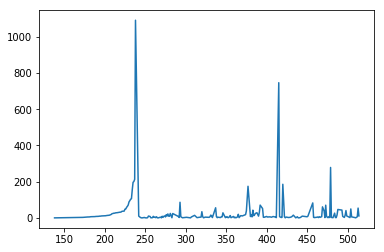

In [111]:
plt.plot(df['area'])

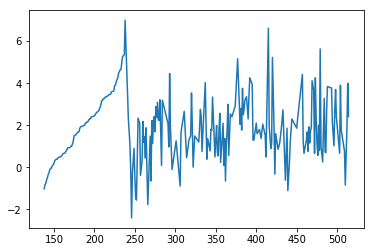

In [112]:
plt.plot(np.log( df['area'] ) )

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop( 'area', axis = 1),
    np.log( df[ 'area' ] ), 
    test_size=0.33, 
    random_state=42
)

Предсказание площади лесных пожаров. На основе погодных измерений необходимо предсказать объем выгоревших лесных массивов на севере Португалии. Выборка состоит из 13 признаков и 517 объектов. Для решения задачи предлагается использовать метод наименьших квадратов с регуляризацией. Нарисовать график весов признаков и общей ошибки на кросс-валидации при изменении параметра регуляризации. Какие признаки наиболее важны для нашей задачи? Что изменится, если предварительно все признаки стандартизовать?

In [164]:
predictions = {}
weights = {}

k = 50

for alpha in np.linspace( 0.1, 1., k ):
    
    classifier = linear_model.Lasso( alpha=alpha )
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
        
    predictions[ alpha ] = prediction
    weights[ alpha ] = classifier.coef_

In [165]:
def plot_weigts( wieghts ):
    
    start = 0
    stop = len( list( weights.values() )[ 0 ] ) - 1
    
    fig, ax = plt.subplots( stop, figsize=(5,30) )
    
    for i in range( start, stop , 1):
        d = {  alpha: weight[ i ]  for alpha, weight in weights.items() }
        lists = sorted( d.items() ) # sorted by key, return a list of tuples

        x, y = zip( *lists ) # unpack a list of pairs into two tuples

        ax[ i ].plot( x, y )
        ax[ i ].set_title( df.columns[ i ] )
        
    plt.show()

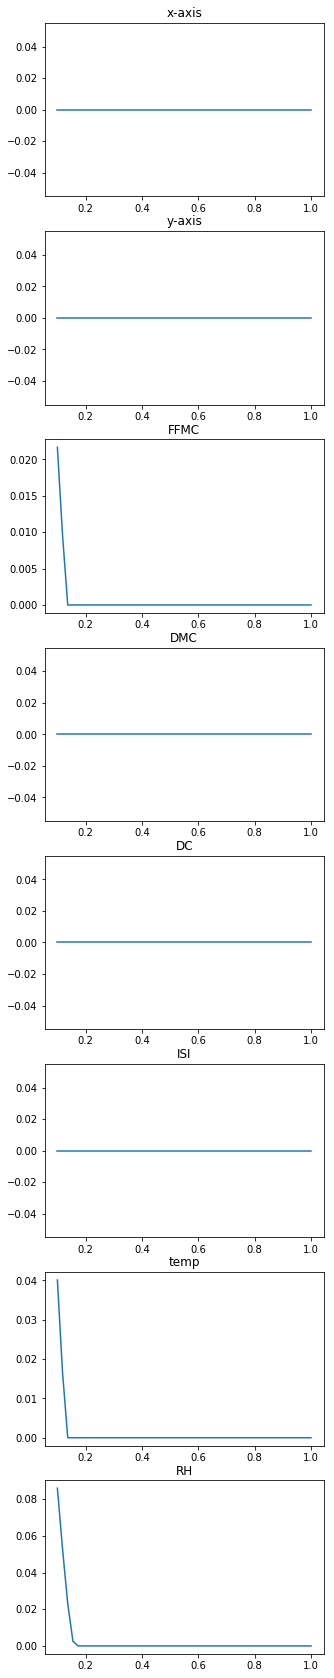

In [166]:
plot_weigts( weights )

In [171]:
def plot_crossval_error( predictions, y_test ):
    errors = []
    alphas = []
    for alpha, preds in predictions.items():
        error = mae( y_test, preds ) * 10**5
        errors.append(error)
        alphas.append(alpha)

    plt.plot( alphas, errors )
    plt.show()

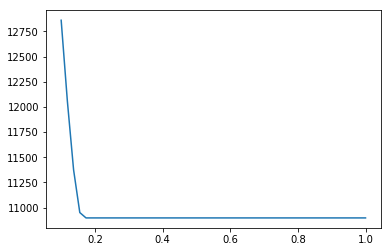

In [172]:
plot_crossval_error( predictions, y_test )

Стандартизуем все фичи и повторим

In [130]:
 from sklearn.preprocessing import StandardScaler

In [174]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform( df.drop( 'area', axis = 1).values, df[ 'area' ].values, )

In [175]:
X = df_scaled[:, :-1]
y = df_scaled[:, [-1]]

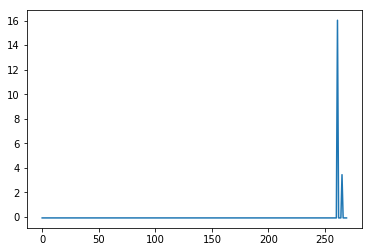

In [176]:
plt.plot(y)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.33, 
    random_state=42
)

In [178]:
predictions = {}
weights = {}

k = 10

for alpha in np.linspace( 0.1, 1., k ):
    
    classifier = linear_model.Lasso( alpha=alpha )
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
        
    predictions[ alpha ] = prediction
    weights[ alpha ] = classifier.coef_

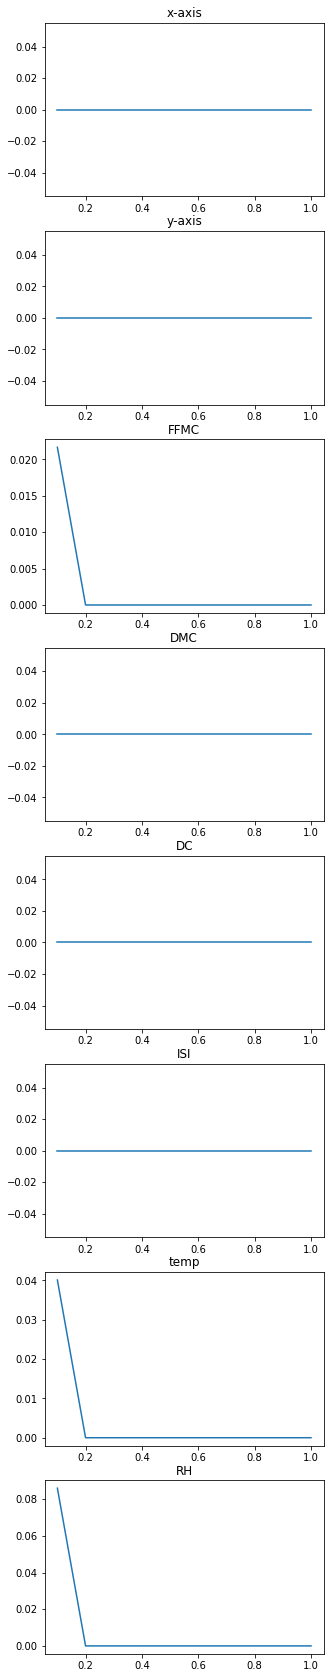

In [179]:
plot_weigts( weights )

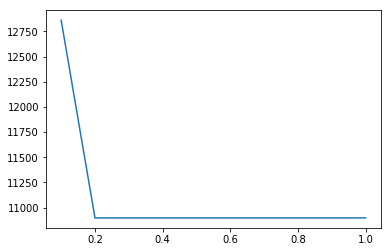

In [180]:
plot_crossval_error( predictions, y_test )